In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from mlxtend.data import loadlocal_mnist

In [2]:
np.random.seed(10)

In [3]:
def process_mnist_data() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    mnist_path = './MNIST/'
    train_images, train_labels = loadlocal_mnist(
        images_path = mnist_path + './train-images.idx3-ubyte',
        labels_path = mnist_path + './train-labels.idx1-ubyte'
    )
    test_images, test_labels = loadlocal_mnist(
        images_path = mnist_path + './t10k-images.idx3-ubyte',
        labels_path = mnist_path + './t10k-labels.idx1-ubyte'
    )
    return train_images, train_labels, test_images, test_labels

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

In [5]:
def process_cifar_dataset() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    cifar_path = './cifar-10-python/cifar-10-batches-py'
    data_batch = unpickle(cifar_path + '/data_batch_1')
    train_images, train_labels = data_batch[b'data'], np.array(data_batch[b'labels'])
    for i in range(2,6):
        data_batch = unpickle(cifar_path + '/data_batch_' + str(i))
        train_images = np.concatenate((train_images, data_batch[b'data']), axis=0)
        train_labels = np.concatenate((train_labels, np.array(data_batch[b'labels'])), axis=0)
    test_batch = unpickle(cifar_path + '/test_batch')
    test_images, test_labels = test_batch[b'data'], np.array(test_batch[b'labels'])
    return train_images, train_labels, test_images, test_labels

In [6]:
def process_toy_dataset():
    toy_dataset_path = './Toy Dataset/'

In [7]:
def relu(matrix:np.ndarray) -> np.ndarray:
    return matrix * (matrix > 0)

In [8]:
class ConvolutionLayer:
    def __init__(self, output_channel_count: int, filter_dimension: int, stride: int, padding: int):
        self.output_channel_count = output_channel_count
        self.filter_dimension = filter_dimension
        self.stride = stride
        self.padding = padding

    def forward(self, input_image: np.ndarray) -> np.ndarray:
        input_dimentions = input_image.shape[0]
        output_dimentions = (input_dimentions - self.filter_dimension + 2 * self.padding) // self.stride + 1
        input_shape = input_image.shape

        filters = np.random.rand(
            self.output_channel_count,
            self.filter_dimension,
            self.filter_dimension,
            input_shape[2]
        )

        bias = np.random.rand(self.output_channel_count)

        padded_image = np.pad(input_image, [(self.padding,self.padding), (self.padding,self.padding), (0,0)], mode='constant') * 1.0
        padded_image /= 255.0
        padded_dimensions = padded_image.shape

        output = np.zeros((output_dimentions, output_dimentions, self.output_channel_count))

        for i in range(self.output_channel_count):
            image_y = out_y = 0
            while image_y + self.filter_dimension <= padded_dimensions[1]:
                image_x = out_x = 0
                while image_x + self.filter_dimension <= padded_dimensions[0]:
                    image_slice = padded_image[image_x:image_x+self.filter_dimension, image_y:image_y+self.filter_dimension, :]
                    output[out_x, out_y, i] = np.sum(image_slice * filters[i, :, :, :]) + bias[i]
                    image_x += self.stride
                    out_x += 1
                image_y += self.stride
                out_y += 1

        return output

    def backward(self):
        pass

In [9]:
class ActivationLayer:
    def __init__(self):
        pass

    def forward(self, input_matrix: np.ndarray) -> np.ndarray:
        return relu(input_matrix)

    def backward(self):
        pass

In [10]:
class MaxPoolingLayer:
    def __init__(self, filter_dimension: int, stride: int):
        self.filter_dimension = filter_dimension
        self.stride = stride

    def forward(self, image: np.ndarray) -> np.ndarray:
        input_dimensions = image.shape

        output_dimension = (input_dimensions[0] - self.filter_dimension) // self.stride + 1

        output = np.zeros((output_dimension, output_dimension, input_dimensions[2]))

        image_y = out_y = 0
        while image_y + self.filter_dimension <= input_dimensions[1]:
            image_x = out_x = 0
            while image_x + self.filter_dimension <= input_dimensions[0]:
                image_slice = image[image_x: image_x+self.filter_dimension, image_y: image_y+self.filter_dimension, :]
                output[out_x, out_y, :] = np.max(image_slice, axis=(0, 1))
                image_x += self.stride
                out_x += 1
            image_y += self.stride
            out_y += 1

        return output

    def backward(self):
        pass

In [11]:
class FlatteningLayer:
    def __init__(self):
        pass

    def forward(self, image: np.ndarray) -> np.ndarray:
        return image.flatten().reshape(-1, 1)

    def backward(self):
        pass

In [12]:
class FullyConnectedLayer:
    def __init__(self, output_dimension: int):
        self.output_dimension = output_dimension

    def forward(self, flattened_input: np.ndarray) -> np.ndarray:
        weights = np.random.rand(flattened_input.shape[0], self.output_dimension)
        bias = np.random.rand(self.output_dimension, 1)

        return weights.T @ flattened_input + bias

    def backward(self):
        pass

In [13]:
class SoftmaxLayer:
    def __init__(self):
        pass

    def forward(self, input_matrix: np.ndarray):
        exp = np.exp(input_matrix)
        exp /= np.sum(exp)
        return exp

    def backward(self):
        pass

(28, 28, 10)


array([[0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225],
       [0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225],
       [0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.4751

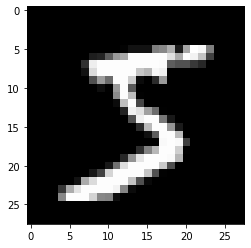

In [14]:
x_train, y_train, x_test, y_test = process_mnist_data()
c = ConvolutionLayer(10, 3, 1, 1)
img = x_train[0].reshape(28, 28, 1)
plt.imshow(img, cmap='gray')
o = c.forward(img)
print(o.shape)
o [:, :, 0]

In [15]:
m = MaxPoolingLayer(2, 2)
o1 = m.forward(o)
o1[:, :, 0]

array([[0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225],
       [0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225, 0.47513225,
        0.47513225, 0.47513225, 0.47513225, 0.47513225],
       [0.47513225, 0.47513225, 0.47513225, 0.49502764, 0.6681417 ,
        1.12282978, 1.58939059, 1.79311338, 2.36556271, 2.22116027,
        2.72642815, 2.63075261, 0.89777584, 0.47513225],
       [0.47513225, 0.47513225, 0.47513225, 1.05420173, 3.31135128,
        3.77384819, 4.18156003, 4.25797042, 4.3863292 , 3.01024736,
        3.25626837, 2.89020845, 1.04721527, 0.47513225],
       [0.47513225, 0.47513225, 0.47513225, 1.35182866, 3.80338368,
        4.35569152, 4.43725959, 3.37215521, 3.34484006, 2.27299101,
        0.86899207, 0.64769414, 0.47513225, 0.47513225],
       [0.47513225, 0.47513225, 0.4

In [16]:
f = FlatteningLayer()
o2 = f.forward(o1)
o2

array([[0.47513225],
       [0.29279798],
       [0.06425106],
       ...,
       [0.44077382],
       [0.31827281],
       [0.51979699]])

In [17]:
fc = FullyConnectedLayer(10)
o3 = fc.forward(o2)
o3

array([[1305.949087  ],
       [1361.06197694],
       [1325.32926031],
       [1324.71246488],
       [1296.24591396],
       [1275.11060115],
       [1298.03139898],
       [1292.31739477],
       [1344.6868206 ],
       [1321.2595372 ]])

In [18]:
s = SoftmaxLayer()
o3 = np.arange(1, 11).reshape(10, 1)
o4 = s.forward(o3)
o4

array([[7.80134161e-05],
       [2.12062451e-04],
       [5.76445508e-04],
       [1.56694135e-03],
       [4.25938820e-03],
       [1.15782175e-02],
       [3.14728583e-02],
       [8.55520989e-02],
       [2.32554716e-01],
       [6.32149258e-01]])

(32, 32, 10)


array([[1.19259592, 1.45127543, 1.52284702, ..., 4.53990309, 4.45026228,
        2.61804771],
       [1.05532045, 1.57874008, 1.85158113, ..., 5.56015654, 5.41716475,
        3.57212635],
       [0.87353687, 1.48017553, 2.03028299, ..., 4.97818222, 4.62529817,
        3.00530919],
       ...,
       [5.27581968, 7.29816021, 6.69712611, ..., 5.28154562, 4.06422914,
        1.71167961],
       [5.17659854, 7.37055649, 7.00512997, ..., 6.18981284, 5.31111439,
        2.64343457],
       [3.44989009, 4.89043487, 4.67587802, ..., 4.51865428, 4.05212684,
        2.01301236]])

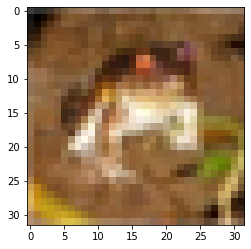

In [19]:
x_train, y_train, x_test, y_test = process_cifar_dataset()
c = ConvolutionLayer(10, 3, 1, 1)
img = x_train[0].reshape(3, 32, 32)
img = img.transpose(1, 2, 0)
plt.imshow(img)
o = c.forward(img)
print(o.shape)
o[:, :, 0]

In [20]:
o1 = m.forward(o)
o1[:, :, 0]

array([[ 1.57874008,  2.78351272,  4.72645153,  5.21375463,  5.11362216,
         4.75518921,  4.89593573,  5.01262264,  4.94878451,  5.02008552,
         5.33305063,  5.24641477,  5.56122462,  5.93081587,  5.77694137,
         5.41716475],
       [ 2.18370519,  3.73958593,  4.48784013,  4.63765716,  4.63204741,
         4.56652407,  4.72339966,  4.89304656,  4.68167321,  4.85964271,
         5.41555479,  5.42959275,  5.11660315,  5.28386482,  5.17444631,
         4.62529817],
       [ 3.56016209,  4.67071644,  4.79959965,  4.52386223,  4.68082805,
         4.54758704,  4.4861253 ,  4.44726313,  4.10064782,  4.4753744 ,
         4.86651621,  5.37027905,  5.53355455,  4.80045718,  3.949032  ,
         2.89083049],
       [ 4.76145042,  4.97969176,  4.94084731,  4.82091624,  5.04031337,
         4.68028518,  3.42009031,  3.71256923,  5.4654016 ,  4.50067081,
         3.93877439,  5.03658726,  5.4856853 ,  5.16762042,  4.41024119,
         4.32803707],
       [ 6.24835751,  5.88786647,  5